# Assignment 3: Method and Plan

- Our group have decided to work on the "Heart Disease Data Set" from Kaggle(original from [UCI Machine Learning](https://doi.org/10.24432/C52P4X)). This dataset contains information related to heart disease diagnosis from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach. It contains various clinical and demographic attributes of patients, for example, age, gender, cholesterol levels, and resting blood pressure results along with the “target” variable indicating the presence or absence of heart disease. The dataset contained 1025 instances/patients.

- The data was collected from the four following locations:


         1. Cleveland Clinic Foundation
         2. Hungarian Institute of Cardiology, Budapest
         3. V.A. Medical Center, Long Beach, CA
         4. University Hospital, Zurich, Switzerland
         
- All the attributes in the data:    
    - Age -- Integer
    - Sex (1 = Male; 0 = Female) -- Factor
    - Chest Pain Type (4 values) -- Factor
    - Resting Blood Pressure (in mm Hg on admission to the hospital) -- Integer
    - Serum Cholesterol in mg/dL -- Double
    - Fasting Blood Sugar > 120 mg/dL (1 = True; 0 = False) -- Factor
    - Resting Electrocardiographic Results (Values 0, 1, 2) -- Factor
    - Maximum Heart Rate Achieved -- Integer
    - Exercise-Induced Angina (1 = True; 0 = False) -- Factor
    - Oldpeak = ST Depression Induced by Exercise Relative to Rest -- Double
    - The Slope of the Peak Exercise ST Segment -- Factor
    - Number of Major Vessels (0-3) Colored by Fluoroscopy -- Integer/Factor
    - Thal: 0 = Normal; 1 = Fixed Defect; 2 = Reversible Defect -- Factor
    - Target: 0=has heart disease, 1=no heart disease -- Factor(Response Variable)

- **Research Topic: Determine the possible numeric indicators of heart disease which will then be used to predict the presence of heart disease in patients.**

In [1]:
# Load the required libraries

library(tidyverse)
library(repr)
library(gridExtra)
library(GGally)
library(ggplot2)
library(reshape2)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Data Cleaning

In [2]:
# Define the URL for the heart disease dataset
heart_link <- "https://raw.githubusercontent.com/richdalao/Stat_301_project/main/heart.csv"

# Read the dataset from the specified URL, assuming the first row contains column names
heart_data <- read.csv(heart_link, header=TRUE)

# Rename the column names for clarity and consistency
colnames(heart_data) <- c("age", "sex", "chest_pain", 
                         "restb_pressure", "se_cholest", "fast_bsuger_120", "restecg",
                         "maxh_rate", "exer_angina", "depression_induced", "slope", "major_vess", "thal", "heart_disease")

# Display the first few rows of the dataset to check its structure
head(heart_data)

,age,sex,chest_pain,restb_pressure,se_cholest,fast_bsuger_120,restecg,maxh_rate,exer_angina,depression_induced,slope,major_vess,thal,heart_disease
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [3]:
# Convert "sex" column to a factor with levels "male" and "female"
heart_data$sex <- ifelse(heart_data$sex == 1, "male", "female")
heart_data$sex <- as.factor(heart_data$sex)

# Convert "fast_bsuger_120" column to a factor with levels "true" and "false"
heart_data$fast_bsuger_120 <- ifelse(heart_data$fast_bsuger_120 == 1, "true", "false")
heart_data$fast_bsuger_120 <- as.factor(heart_data$fast_bsuger_120)

# Convert "exer_angina" column to a factor with levels "true" and "false"
heart_data$exer_angina <- ifelse(heart_data$exer_angina == 1, "true", "false")
heart_data$exer_angina <- as.factor(heart_data$exer_angina)

# Convert "restecg" column to a factor with levels "true" and "false"
heart_data$restecg <- as.factor(heart_data$restecg)

# Convert "chest_pain", "thal" and "slope" columns to factors
heart_data$chest_pain <- as.factor(heart_data$chest_pain)
heart_data$thal <- as.factor(heart_data$thal)
heart_data$slope <- as.factor(heart_data$slope)

# Convert "heart_disease" column to a factor with levels "disease" and "no_disease"
heart_data$heart_disease <- ifelse(heart_data$heart_disease == 0, "disease", "no_disease")
heart_data$heart_disease <- as.factor(heart_data$heart_disease)

# Display the first few rows of the modified dataset
head(heart_data)

,age,sex,chest_pain,restb_pressure,se_cholest,fast_bsuger_120,restecg,maxh_rate,exer_angina,depression_induced,slope,major_vess,thal,heart_disease
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
1,52,male,0,125,212,false,1,168,false,1.0,2,2,3,disease
2,53,male,0,140,203,true,0,155,true,3.1,0,0,3,disease
3,70,male,0,145,174,false,1,125,true,2.6,0,0,3,disease
4,61,male,0,148,203,false,1,161,false,0.0,2,1,3,disease
5,62,female,0,138,294,true,1,106,false,1.9,1,3,2,disease
6,58,female,0,100,248,false,0,122,false,1.0,1,0,2,no_disease


### Visualization

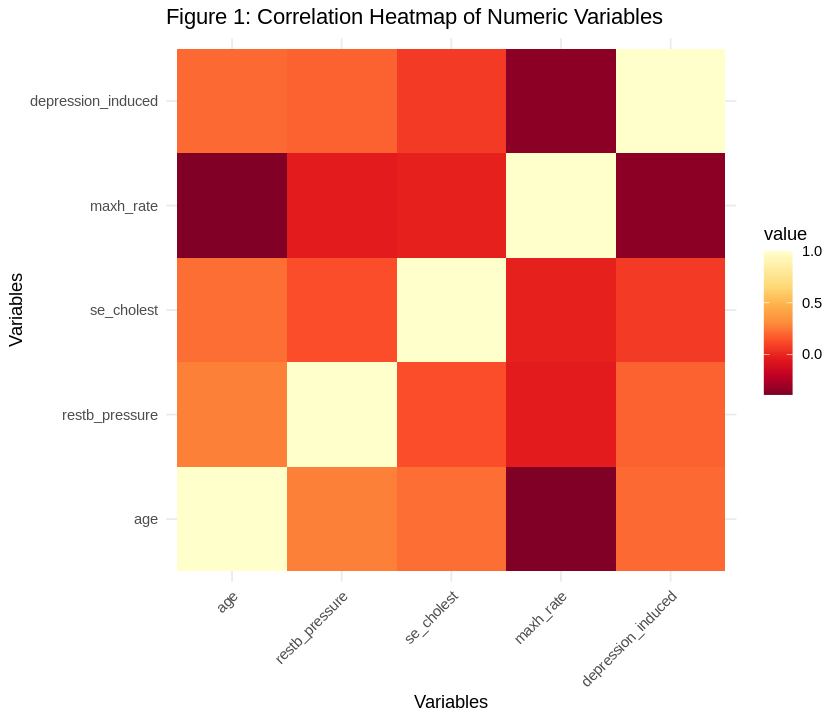

In [4]:
# Adjust size of the plot as needed.
options(repr.plot.width = 7, repr.plot.height = 6)

# Select the numeric variables from the data frame
numeric_data <- heart_data[, c("age", "restb_pressure", "se_cholest", "maxh_rate", "depression_induced")]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Create a heatmap
heatmap_data <- melt(correlation_matrix)

# Set the color palette for the heatmap
colors <- colorRampPalette(rev(brewer.pal(9, "YlOrRd")))(100)

# Create the heatmap using ggplot2
ggplot(heatmap_data, aes(Var2, Var1, fill = value)) +
  geom_tile() +
  scale_fill_gradientn(colors = colors) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Figure 1: Correlation Heatmap of Numeric Variables", x="Variables", y="Variables")

- After generating a correlation Heatmap(**figure 1**) for the numeric variables, we did not detect any significant multicollinearity.

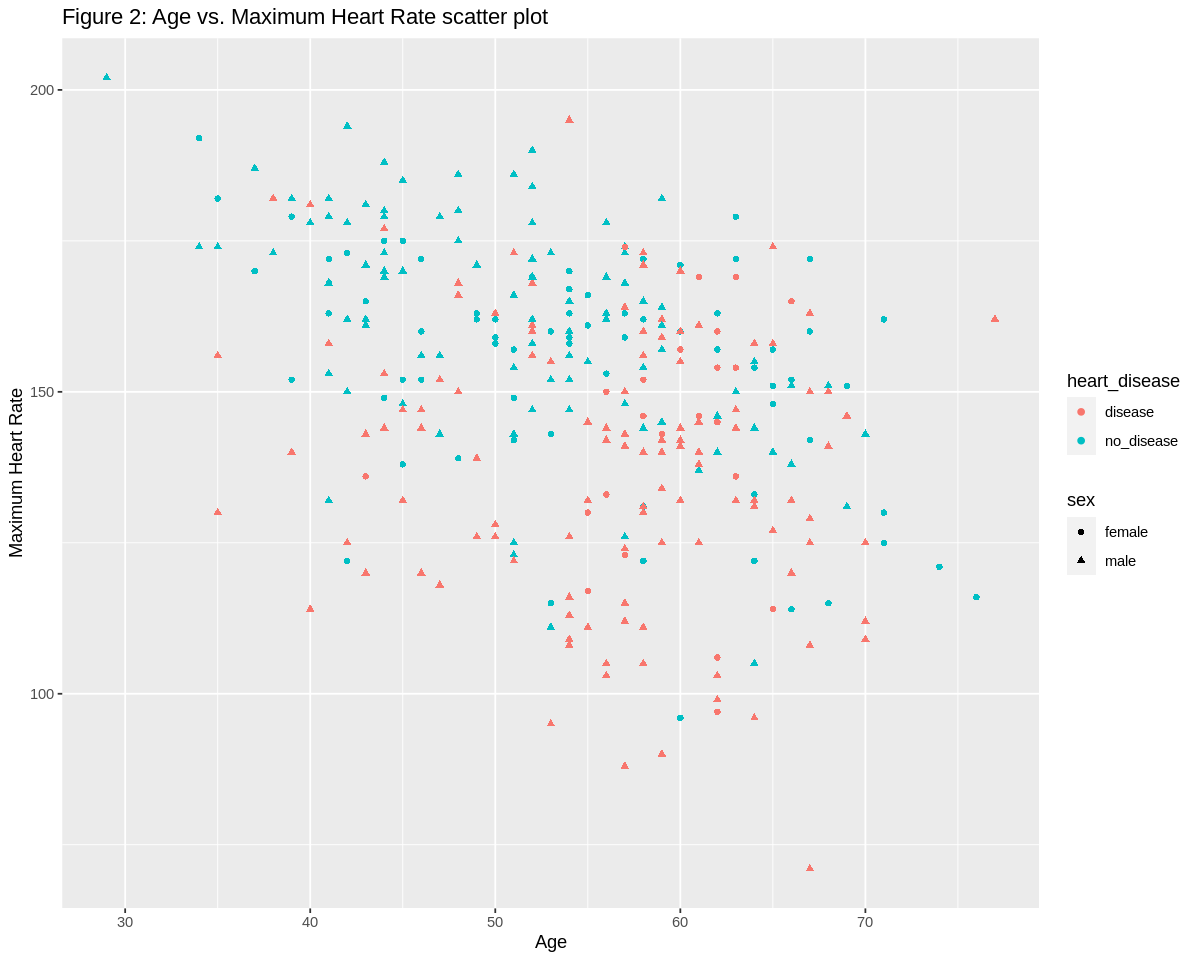

In [5]:
# Adjust size of the plot as needed.
options(repr.plot.width = 10, repr.plot.height = 8)

# Create a scatter plot using ggplot2 to visualize the relationship between age and maximum heart rate.

# Define the plot object "com_plot" and specify the data frame "heart_data" for the plot.
com_plot <- ggplot(heart_data, aes(x = age, y = maxh_rate, fill = heart_disease, shape = sex)) +

  # Add a scatter plot layer with points color-coded by "heart_disease" and shaped by "sex."
  geom_point(aes(color = heart_disease, shape = sex)) +

  # Set the title and axis labels for the plot.
  labs(title = "Figure 2: Age vs. Maximum Heart Rate scatter plot", x = "Age", y = "Maximum Heart Rate")

# Display the created scatter plot "com_plot."
com_plot

- Graphically, **figure 2** appears that individuals with heart disease tend to exhibit lower maximum heart rates. However, there is no clear and obvious pattern evident in this scatter plot.

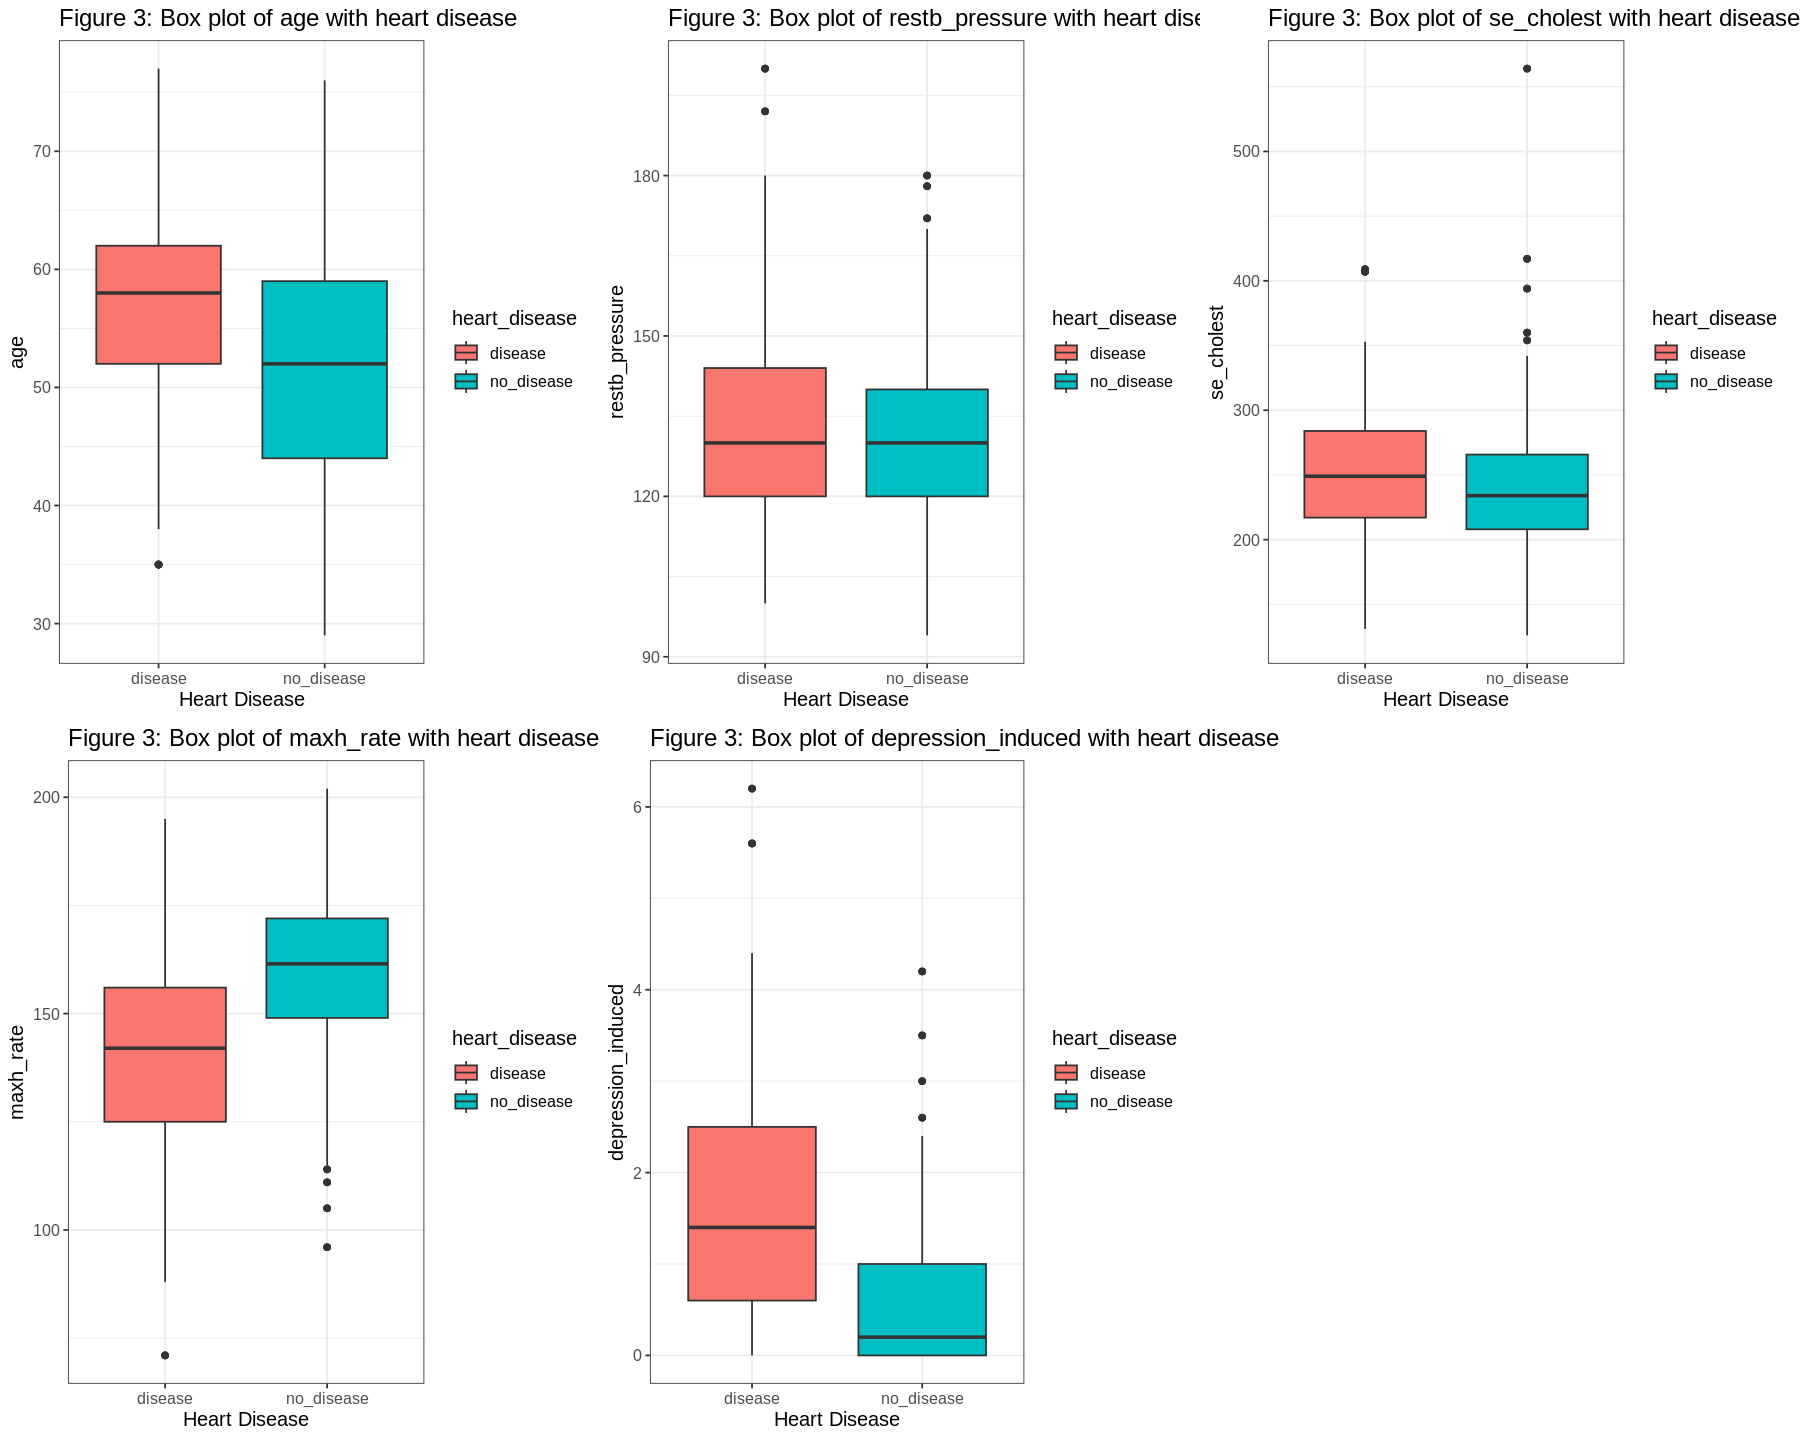

In [8]:
# Adjust size of the plot as needed.
options(repr.plot.width = 15, repr.plot.height = 12)

# Define the numeric variables you want to include
numeric_vars <- c("age", "restb_pressure", "se_cholest", "maxh_rate", "depression_induced")

# Create a vertical layout of boxplots for each numeric variable
va_boxplots <- list()
for (var in numeric_vars) {
  va_boxplot <- ggplot(data = heart_data, aes(x = heart_disease, y = .data[[var]], fill = heart_disease)) +
    geom_boxplot() +
    theme_bw() +
    ggtitle(paste("Figure 3: Box plot of", var, "with heart disease")) +
    labs(x = "Heart Disease", y = var) +
    theme(text = element_text(size = 12))
  va_boxplots[[var]] <- va_boxplot
}

# Combine all boxplots vertically
library(gridExtra)
grid.arrange(grobs = va_boxplots, ncol = 3)

- I selected boxplots as a visualization method because they are particularly effective for comparing the distribution of numeric variables (potential indicators) across two levels of a categorical variable, which in this case is 'heart_disease' (disease or no disease). Boxplots offer a clear and intuitive representation of how the distribution of a numeric indicator varies between patients with and without heart disease.

- Furthermore, the examination of boxplots allows us to gain valuable insights into which indicator variables exhibit noteworthy distributional disparities between the two groups. Variables that demonstrate substantial differences in their distribution between the two groups can be considered strong candidates as potential indicators for predicting the presence of heart disease. For example, maximum heart rate may be considered a strong candidate as a potential indicator for predicting the presence of heart disease.

- A limitation of boxplots is that, while they are useful for comparing numeric variables across categories, they are not the most suitable choice for exploring the relationship between categorical and categorical variables. Different visualization techniques(such as bar chart) are more appropriate for such analyses.

# Methods and Plan

In our research question which with a binary response variable (factor with 2 levels) and considering the scope of the project involving logistic regression as the chosen modeling technique, the method that stands out as particularly suitable is Lasso Regression.
Lasso Regression for Model Selection
#### Why this method is appropriate?
 1. Lasso regression employs L1 regularization, which introduces a penalty term to the model. This penalty shrinks less influential coefficients to zero, effectively performing feature selection by eliminating less important variables, reducing overfitting. This property is beneficial in identifying the most significant numeric indicators associated with heart disease.
2. Although there is no obvious multicollinearity found in our dataset, lasso has an inherent ability to handle multicollinearity among predictor variables. It tends to select one variable from a group of highly correlated variables, effectively dealing with multicollinearity issues present in the dataset.

#### Assumptions required for the method selected
Again, we are doing a logistic regression model for our research question. But just as other regression model, lasso also has the same assumptions:

1. Linearity: Lasso regression assumes a linear relationship between the predictors (independent variables) and the response variable (dependent variable).
2. Independence of Errors: Similar to linear regression, Lasso regression assumes that the errors (residuals) generated by the model are independent of each other.
3. No Multicollinearity: Lasso regression, like other regression techniques, assumes that there is no perfect multicollinearity among the predictors.
4. Regularization Parameter Tuning: Lasso regression involves the use of a regularization parameter (lambda or alpha) that controls the degree of penalty imposed on the coefficients.
5. Homoscedasticity: Assumes constant variance of residuals across predictor levels.

#### Potential limitations or weaknesses of the method
1. Model Interpretability: While Lasso helps in feature selection, the resulting model may become less interpretable if many predictors are shrunk to zero. Understanding the impact of eliminated variables becomes challenging.
2. Variable Selection Biases: Lasso tends to arbitrarily select one variable over another among highly correlated predictors. This selection might not always represent the true nature of the relationship among variables.
3. Choice of Regularization Parameter (Lambda): The selection of the regularization parameter (lambda) in Lasso regression requires careful consideration. The optimal value needs to be determined via techniques like cross-validation, which adds computational complexity.

#### Logistic Regression Model
The plan involves utilizing logistic regression for predicting heart disease presence based on the identified numeric indicators. Logistic regression is well-suited for binary classification tasks and is interpretable in terms of odds ratios and probabilities.
By combining the strengths of logistic regression for modeling binary outcomes and Lasso for feature selection, we aim to develop a predictive model that not only accurately forecasts heart disease but also identifies the most crucial numeric indicators contributing to the diagnosis.